<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
boston_df = boston_df.set_index('Unnamed: 0')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9


#### Initial Data Inspection

In [8]:
# Find the data mapping
# No null values
df_eda = boston_df.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [9]:
# Exploratory data
df_eda.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Exploratory Data Analysis and Evaluations (Task 2)

#### Q1: Median Value of Owner-Occupied Homes

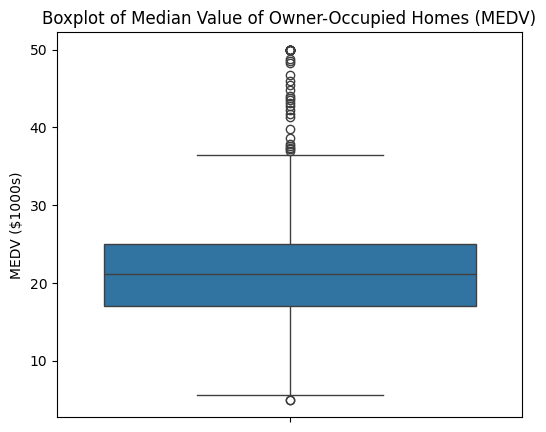

In [27]:
plt.subplots(figsize=(6,5))
sns.boxplot(y=df_eda['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

In [54]:
print('Median of MEDV:',df_eda['MEDV'].median())
print('Mean of MEDV:',df_eda['MEDV'].mean().round(2))
print('Mininum Value of MEDV:',df_eda['MEDV'].min())
print('Maximum Value of MEDV:',df_eda['MEDV'].max())

Median of MEDV: 21.2
Mean of MEDV: 22.53
Mininum Value of MEDV: 5.0
Maximum Value of MEDV: 50.0


* This boxplot shows the distribution of median home values. The box represents the interquartile range (IQR), with the line inside being the median. Whiskers extend to 1.5 * IQR from the box. Points beyond the whiskers are considered outliers.
* A concentration of outliers at the higher end suggests some very expensive homes, while outliers at the lower end indicate very cheap homes.
* Median MEDV: 21.20
* Mean MEDV: 22.53
* Minimum MEDV: 5.00
* Maximum MEDV: 50.00

#### Q2: Histogram for the Charles River Variable

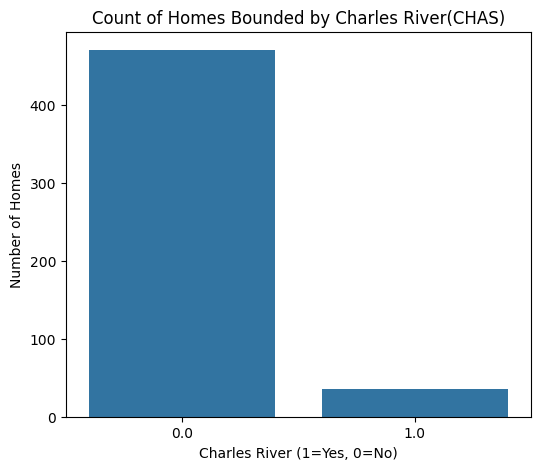

In [29]:
plt.subplots(figsize=(6,5))
sns.countplot(x=df_eda['CHAS'])
plt.title('Count of Homes Bounded by Charles River(CHAS)')
plt.xlabel('Charles River (1=Yes, 0=No)')
plt.ylabel('Number of Homes')
plt.show()

* This plot shows the count of homes bounded by the Charles River and those that are not.
* It clearly shows that a much smaller proportion of homes in the dataset are bounded by the Charles River compared to those that are not.
* Number of homes not bounded by Charles River (0): 471
* Number of homes bounded by Charles River (1): 35
* Proportion bounded by Charles River: 6.92%

#### Q3: Provide a boxplot for the MEDV variable vs the AGE variable

In [33]:
max_age = df_eda['AGE'].max()
min_age = df_eda['AGE'].min()

print('Max Age:' ,max_age)
print('Min Age:',min_age)

Max Age: 100.0
Min Age: 2.9


In [36]:
df_eda['AGE_group'] = pd.cut(df_eda['AGE'],[min_age, 35, 70, max_age], include_lowest=True, labels= ['35 years and younger', 'between 35 and 70 years'
, '70 years and older'])
df_eda.groupby('AGE_group')['AGE'].count()

<ipython-input-36-769b06aa1908>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby('AGE_group')['AGE'].count()


AGE_group
35 years and younger        91
between 35 and 70 years    128
70 years and older         287
Name: AGE, dtype: int64

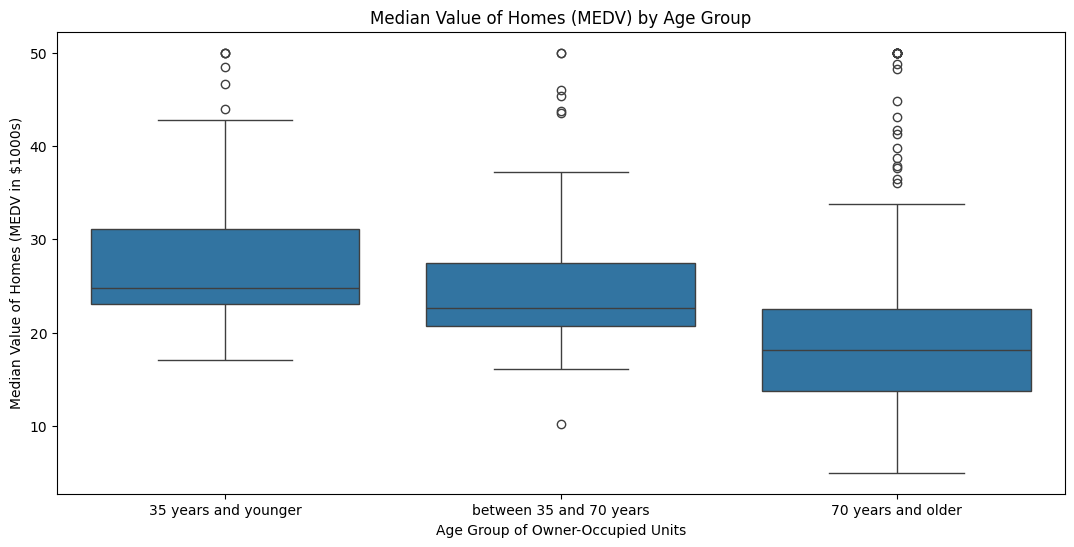

In [42]:
plt.subplots(figsize=(13,6))
sns.boxplot(x='AGE_group', y='MEDV', data=df_eda)
plt.title('Median Value of Homes (MEDV) by Age Group')
plt.xlabel('Age Group of Owner-Occupied Units')
plt.ylabel('Median Value of Homes (MEDV in $1000s)')
plt.show()

This boxplot visually compares the distribution of median home values (MEDV) across three different age groups of homes.
Observe the following:
* Medians: Comparing the central lines within each box. This tells you which age group has a higher or lower typical median home value.
* Spread (IQR): Looking at the height of each box. A taller box means a wider spread (more variability) in MEDV within that age group.
* Outliers: The individual points outside the whiskers represent unusually high or low MEDV values for that specific age group.
* Overall Trend: Newer home tend to have higher overall value compared to older home


### Q4: Scatter Plot to show the relationship between NOX and proportion of INDUS

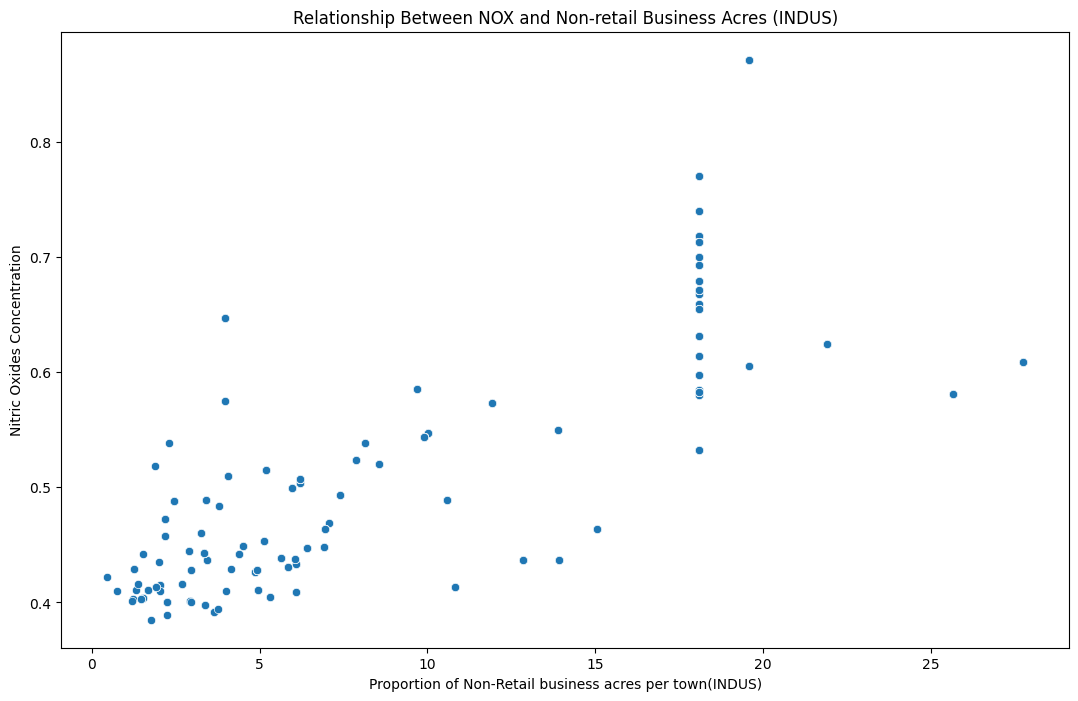

In [73]:
plt.subplots(figsize=(13,8))
sns.scatterplot(x='INDUS',y='NOX', data=df_eda)
plt.title('Relationship Between NOX and Non-retail Business Acres (INDUS)')
plt.xlabel('Proportion of Non-Retail business acres per town(INDUS)')
plt.ylabel('Nitric Oxides Concentration')
plt.show()

* There appears to be a clear positive correlation between INDUS (proportion of non-retail business acres) and NOX (nitric oxide concentrations). As the proportion of non-retail business acres in a town increases, the nitric oxide concentration generally tends to increase as well.
* The points show a relatively strong positive trend, especially in the lower and middle ranges of INDUS. This suggests that INDUS is a good indicator of NOX levels to some extent.
* For higher values of INDUS (e.g., above 18-20), the increase in NOX might become less steep, or the points might become more scattered, indicating a potential saturation or different influencing factors at very high industrialization levels.
* Areas with a higher proportion of non-retail businesses are expected to have higher levels of air pollution, specifically nitric oxides.


#### Q5: Histogram for Pupil to Teacher Ratio

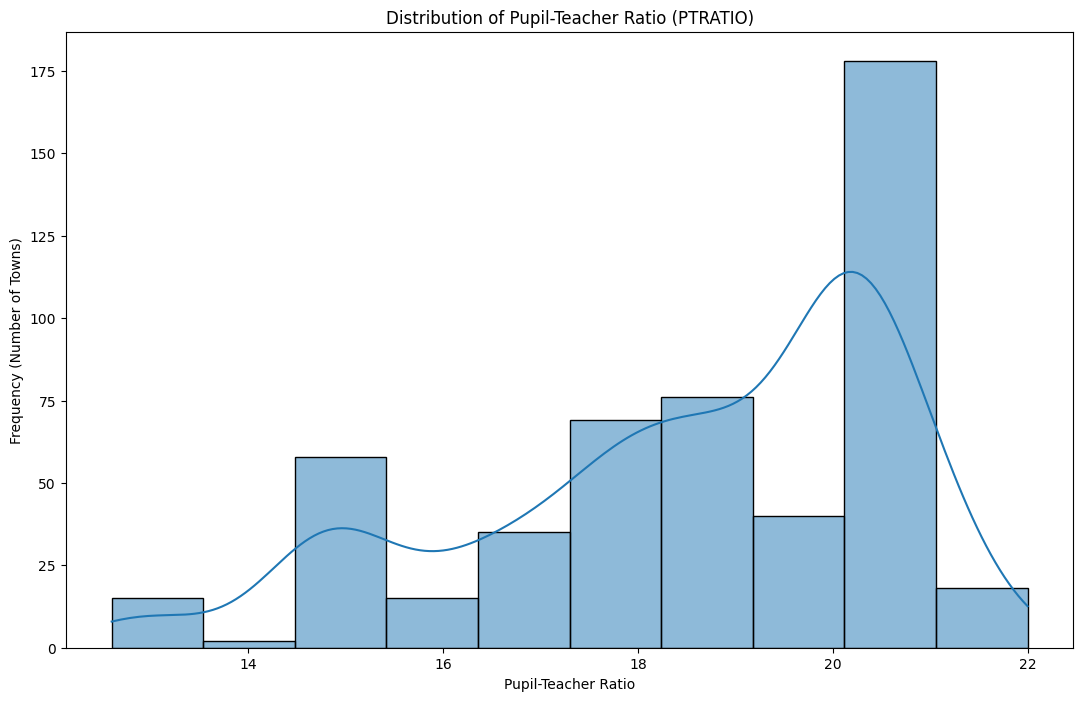

In [47]:
plt.subplots(figsize=(13,8))
sns.histplot(df_eda['PTRATIO'], kde=True, bins=10)
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency (Number of Towns)')
plt.show()

* The distribution appears somewhat concentrated around a particular range. It seems to be bimodal or perhaps slightly skewed.
* There might be two peaks or modes in the distribution. One peak seems to be around a lower PTRATIO (e.g., around 14-16), and another more prominent peak around a higher PTRATIO (e.g., around 20-21). This suggests that towns tend to fall into a couple of distinct categories regarding their pupil-teacher ratios.
* The most frequent pupil-teacher ratios appear to be in the higher end of the spectrum, around 20-21.
* The ratios range from roughly 12 to 22, indicating the variability in pupil-teacher ratios across the towns in the dataset.
* This kind of bimodal distribution often suggests that there might be different types of communities or school districts within the Boston area, each with its own characteristic pupil-teacher ratio.


## Statistical Test on Boston Housing Data (Task 3)

#### Q1: T-test for Independent Samples

In [63]:
medv_chas_1 = df_eda[df_eda['CHAS']==1]['MEDV']
medv_chas_0 = df_eda[df_eda['CHAS']==0]['MEDV']

lavene_test_result = stats.levene(medv_chas_0, medv_chas_1)
lavene_test_result

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Since the p-value (0.03) is less than alpha=0.05, we reject the null hypothesis. This means that the variances of MEDV for homes bounded by the Charles River and those not bounded by it are significantly different. Therefore, when conducting the independent samples t-test, we should assume unequal variances.



In [65]:
t_test_result = stats.ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)
t_test_result

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

* Ho: There is no significant difference for `MEDV` bounded by the river Charles
* Ha: There is significant difference for `MEDV` bounded by the riever Charles 
* Since the p-value (0.003) is less than alpha=0.05, we reject the null hypothesis.
* Conclusion: There is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by it. Homes bounded by the Charles River tend to have a higher median value.

#### Q2: MEDV vs Age Groups

In [66]:
anova_model = ols('MEDV ~ C(AGE_group)', data=df_eda).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(AGE_group),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


* Ho: There is no significance diference between `MEDV` and `AGE_group`
* Ha: There is significance difference between `MEDV` and `AGE_group`
* Since the p-value (<0.001) is much less than alpha=0.05, we reject the null hypothesis.
* Conclusion: There is a significant difference in the median values of houses (MEDV) across the different age groups of owner-occupied units. This suggests that the age of a home's construction (categorized into these groups) has a statistically significant impact on its median value.

#### Q3: Pearson Correlation: NOX and INDUS

In [69]:
pearson_corr, p_value_pearson = stats.pearsonr(df_eda['NOX'], df_eda['INDUS'])
print('Pearson Correlation:', pearson_corr)
print('P-Value Pearson Correlation:', p_value_pearson)

Pearson Correlation: 0.7636514469209192
P-Value Pearson Correlation: 7.913361061210442e-98


* Ho: `NOX` and `INDUS` are not statistically correlated
* Ha: `NOX` and `INDUS` are statistically correlated
* Since the p-value (<0.001) is much less than alpha=0.05, we reject the null hypothesis.
Conclusion: We conclude that there is a significant positive linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). The correlation coefficient of approximately 0.764 indicates a strong positive correlation, meaning that as the proportion of non-retail business acres increases, so does the nitric oxide concentration.



#### Q4: Regression Analysis DIS on MEDV

In [72]:
x = df_eda['DIS']
y = df_eda['MEDV']

# Add a constant to the independent variable for the intercept
x = sm.add_constant(x)

# Create and fit the OLS regression model
model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        19:06:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Ho: `DIS` doesn't has no linear impact towards `MEDV`
* Ha: `DIS` has significant linear impact towards `MEDV`
* The p-value for the DIS coefficient (0.000) is much less than alpha=0.05. Therefore, we reject the null hypothesis and accept that Weighted Distance is impacting the Median Value (MEDV)